In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Original Data

In [20]:
X_original = np.array([[12,0],[14.5,1],[10,2],[18,0],[8.5,4],[15,1],[22,0],[11,5],[13,2],[20.5,1],[24,2],[16,3],[12.5,0],[28,0],[9,6],[25,1],[14,4],[19,2],[10.5,2],[26.5,2],[15.5,5],[17,3]])
Y_original = np.array([[0,],[0,],[0,],[0,],[0],[0,],[1,],[1,],[0,],[1,],[1,],[1,],[0,],[1,],[1,],[1,],[1,],[1,],[0,],[1,],[1,],[1,]])

# Normalization

In [21]:
X_train=(X_original-np.mean(X_original,axis=0))/np.std(X_original,axis=0)
Y_train = Y_original

# Training

In [22]:
w = np.array([[1.0,2.0]])
b = 1

In [23]:
losses=[] # Contains loss for every iteration
alpha=0.05 # Learning Rate
n_epochs = 100 # Total number of iterations

In [24]:
def calculate_loss(a,y):
  return((-y*np.log(a)-(1-y)*np.log(1-a)).item())

In [25]:
def update_parameters(a,x,y,w,b,alpha):
  w-=alpha*(a-y)*x
  b-=alpha*(a-y)
  return (w,b)

In [26]:
def fwd_prop(x,y,w,b,alpha,iteration_loss):
  x = x.reshape(-1,2)
  y = y.item()
  z = (np.matmul(x,w.T) + b).item()
  a = (1/(1+np.exp(-z))).item()
  iteration_loss+=calculate_loss(a,y)
  w,b = update_parameters(a,x,y,w,b,alpha)
  return (w,b,iteration_loss)

In [27]:
def predict(X_test,w,b):
  result=[]
  z = np.matmul(X_test,w.T) + b
  a = (1/(1+np.exp(-z)))
  for item in a.tolist():
    if(item[0]>=0.5):
      result.append(1)
    else:
      result.append(0)
  return result

In [28]:
for i in range(n_epochs):
  iteration_loss=0 # Avg loss per example in a particular iteration
  for idx,example in enumerate(X_train):
    w,b,iteration_loss = fwd_prop(example,Y_train[idx],w,b,alpha,iteration_loss)
  iteration_loss/=22
  losses.append(iteration_loss)

# Testing

In [29]:
X_test = np.array([[25,1]])
X_test=(X_test-np.mean(X_original,axis=0))/np.std(X_original,axis=0) # Scaling test data

In [30]:
predict(X_test,w,b)

[1]

### Hence, the person will survive

# Plotting Loss vs Iteration

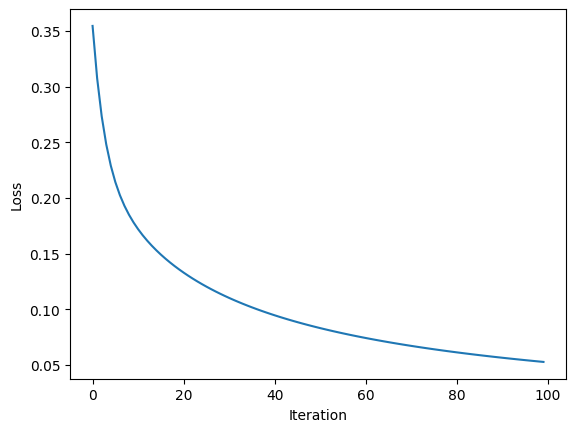

In [31]:
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

#Decision Boundary

In [32]:
# Finding model parameters for unscaled data

w1 = w.tolist()[0][0]/np.std(X_original,axis=0).tolist()[0]
w2 = w.tolist()[0][1]/np.std(X_original,axis=0).tolist()[1]
b_actual = b - w1*np.mean(X_original,axis=0).tolist()[0] - w2*np.mean(X_original,axis=0).tolist()[1]

# Model Parameters (for unscaled data)

In [33]:
print(f'w1:{w1}, w2:{w2}, b:{b_actual}')

w1:0.8867013724995365, w2:2.109099385741456, b:-17.872863875278384


In [34]:
# Decision Boundary Points

x=[]
y=[]
for item in X_original.tolist():
  x.append(item[0])
  y.append(-w1*item[0]/w2 - b_actual/w2)

In [35]:
# Sorting original data into 'Survived' and 'Infected' categories

survived_x1=[]
survived_x2=[]
infected_x1=[]
infected_x2=[]
for idx, item in enumerate(X_original):
  if(Y_original[idx].item()==0):
    infected_x1.append(item[0])
    infected_x2.append(item[1])
  else:
    survived_x1.append(item[0])
    survived_x2.append(item[1])

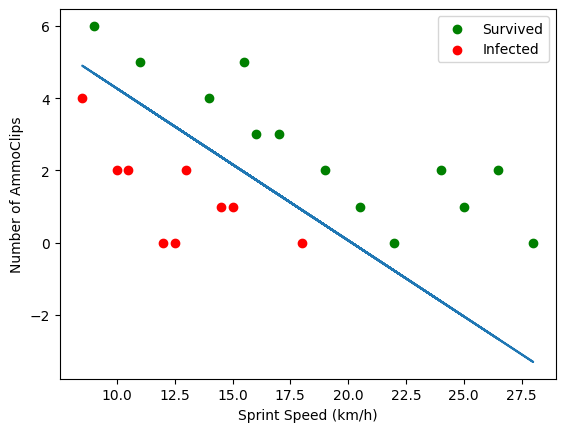

In [36]:
# Plotting

plt.scatter(survived_x1,survived_x2,color='green',label='Survived')
plt.scatter(infected_x1,infected_x2,color='red',label='Infected')
plt.legend()
plt.plot(x,y)
plt.xlabel("Sprint Speed (km/h)")
plt.ylabel("Number of AmmoClips")
plt.show()